In [30]:
## EX_01 proj.01 손글씨 분류하기 ##

## 모듈 import
# import sklearn
# print(sklearn.__version__) #1.0

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report as cls_rpt

In [22]:
## 데이터 준비 & 살펴보기
digit = load_digits(as_frame=True) #frame 확인: True
digit_data = digit.data            #feature 데이터 지정
digit_label = digit.target         #label 데이터 지정

print(digit_data.shape)          #(1797, 64) / 64개 항목으로 이뤄진 1797개의 데이터
print(digit_label.shape)         #(1797,)

print(digit.target_names)        #target class 개수: [0 1 2 3 4 5 6 7 8 9] 총 10개
print(digit.feature_names)       #feature columns가 그냥 pixel로 되어 있음
print(digit.frame)               #frame 으로 구조 확인
print(digit.DESCR)               #8x8 정수 이미지 픽셀 17개

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0    

In [23]:
## 데이터 분리
x_train, x_test, y_train, y_test = tts(digit_data, digit_label, test_size=0.3, random_state=17)    #random_state 17 고정

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) #(1257, 64), (540, 64), (1257,), (540,)

(1257, 64) (540, 64) (1257,) (540,)


In [24]:
## decision tree test

from sklearn.tree import DecisionTreeClassifier as dtc

model_tree = dtc(random_state=25)         
model_tree.fit(x_train, y_train)
tree_pred = model_tree.predict(x_test)

print(cls_rpt(y_test, tree_pred))              #precision 0.86, recall 0.85, f1 score 0.85

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.78      0.78      0.78        59
           2       0.82      0.82      0.82        49
           3       0.86      0.75      0.80        57
           4       0.80      0.88      0.84        56
           5       0.83      0.92      0.87        59
           6       0.93      0.91      0.92        47
           7       0.93      0.91      0.92        56
           8       0.79      0.79      0.79        48
           9       0.86      0.84      0.85        58

    accuracy                           0.85       540
   macro avg       0.86      0.85      0.85       540
weighted avg       0.86      0.85      0.85       540



In [25]:
## random forest test

from sklearn.ensemble import RandomForestClassifier as rfc

model_randf = rfc(random_state=25)
model_randf.fit(x_train, y_train)
randf_pred = model_randf.predict(x_test)

print(cls_rpt(y_test, randf_pred))             #precision 0.97, recall 0.97, f1 score 0.97

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      1.00      0.99        59
           2       0.96      1.00      0.98        49
           3       0.98      0.88      0.93        57
           4       0.98      1.00      0.99        56
           5       0.95      0.97      0.96        59
           6       1.00      0.98      0.99        47
           7       0.93      1.00      0.97        56
           8       0.94      0.96      0.95        48
           9       0.96      0.91      0.94        58

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [33]:
## SVM test

from sklearn.svm import LinearSVC as l_svc

# model_svm = l_svc(random_state=25, C=5, max_iter = 100000)   # ConvergenceWarning 발생해서 iter 횟수 올려줌, but 10만에서도 오류 발생

model_svm = l_svc(random_state=25, max_iter = 1000000)    # C=5일때는 횟수 백만에서도 warning 뜸 -> 횟수 냅두고 C값 디폴트로

model_svm.fit(x_train, y_train)
svm_pred = model_svm.predict(x_test)

print(cls_rpt(y_test, svm_pred))              # precision 0.94, recall 0.94, f1-score 0.93


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.89      0.93      0.91        59
           2       0.94      1.00      0.97        49
           3       0.96      0.84      0.90        57
           4       1.00      0.95      0.97        56
           5       0.90      0.95      0.93        59
           6       0.98      0.98      0.98        47
           7       0.96      0.98      0.97        56
           8       0.86      0.92      0.89        48
           9       0.89      0.84      0.87        58

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.93       540



In [27]:
## SGD test

from sklearn.linear_model import SGDClassifier as sgd

model_sgd = sgd(random_state=25)
model_sgd.fit(x_train, y_train)
sgd_pred = model_sgd.predict(x_test)

print(cls_rpt(y_test, sgd_pred))                # precision 0.93, recall 0.91, f1-score 0.91

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.97      0.66      0.79        59
           2       1.00      1.00      1.00        49
           3       0.98      0.86      0.92        57
           4       1.00      0.95      0.97        56
           5       0.95      0.95      0.95        59
           6       0.94      0.98      0.96        47
           7       0.86      1.00      0.93        56
           8       0.62      0.98      0.76        48
           9       0.96      0.81      0.88        58

    accuracy                           0.91       540
   macro avg       0.93      0.92      0.91       540
weighted avg       0.93      0.91      0.91       540



In [32]:
## Logistics Regression test

from sklearn.linear_model import LogisticRegression as lgr

# model_lgr = lgr(random_state=25)                  # iteration 오류 발생... 횟수를 늘려보자

model_lgr = lgr(random_state=25, max_iter=100000)   # ok 해결
model_lgr.fit(x_train, y_train)
lgr_pred = model_lgr.predict(x_test)

print(cls_rpt(y_test, lgr_pred))                  # precision 0.97, recall 0.97, f1-score 0.97

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.96      0.93      0.95        59
           2       0.98      1.00      0.99        49
           3       0.98      0.93      0.95        57
           4       1.00      0.98      0.99        56
           5       0.97      0.95      0.96        59
           6       0.98      0.98      0.98        47
           7       0.98      1.00      0.99        56
           8       0.88      0.96      0.92        48
           9       0.95      0.97      0.96        58

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



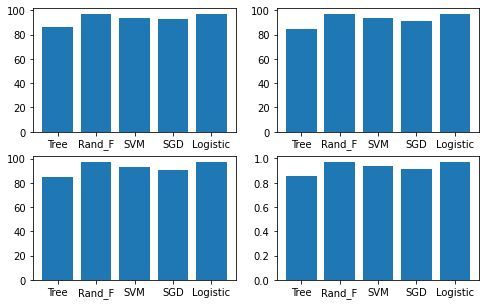

In [31]:
## 결과 모아서 보기

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score  # 다른거 확인하면서 적어놨으니까 여기선 acc만 임포트
%matplotlib inline

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(2,2,1)       # precision
ax2 = fig.add_subplot(2,2,2)       # recall
ax3 = fig.add_subplot(2,2,3)       # f1 score
ax4 = fig.add_subplot(2,2,4)       # accuracy

acc1 = accuracy_score(y_test, tree_pred)
acc2 = accuracy_score(y_test, randf_pred)
acc3 = accuracy_score(y_test, svm_pred)
acc4 = accuracy_score(y_test, sgd_pred)
acc5 = accuracy_score(y_test, lgr_pred)

subject = ['Tree', 'Rand_F', 'SVM', 'SGD', "Logistic"]

points1 = [86, 97, 94, 93, 97]             # precision
points2 = [85, 97, 94, 91, 97]             # recall
points3 = [85, 97, 93, 91, 97]             # f1 score
points4 = [acc1, acc2, acc3, acc4, acc5]   # accuracy

ax1.bar(subject, points1)
ax2.bar(subject, points2)
ax3.bar(subject, points3)
ax4.bar(subject, points4)

fig.show()

In [ ]:
## 결과

# 손글씨 구분 문제는 원본을 얼마나 정확하게 판별하냐가 중요하므로
# TP를 TP라고 맞춘 비율 = recall rate를 기준으로 판별

# 결론: logistic, randomforest 분석이 적합


## 후기(?)

# 사실 4개 그래프 모두 위의 두 방법이 적합하다고 나오긴 하는데, 둘 중 뭐가 나을지는 아직 잘 모르겠다
# SVM이 C값 잘 조절하면 두 방법보다 더 좋게 나올 수도 있을 거 같긴 한데 그 부분도 잘 모르겠다